# WildlifeReID-10k analysis

This notebook analyzes the WildlifeReID-10k dataset. First load the necessary packages. 

In [ ]:
import sys

sys.path.append("../..")

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from thresholds import names_thresholds, thresholds_manual
from utils import SplitterByFeatures, getFolderSize, license_conversion, rename_index

from wildlife_datasets import datasets, splits

We specify the roots, load the dataset and features and verify whether the orderings of the dataset and the features correspond to each other.

In [2]:
os.makedirs("results", exist_ok=True)
root = "/data/wildlife_datasets/data/WildlifeReID10k"
root_images = os.path.join(root, "images")
root_features = "features_dino"

d = datasets.WildlifeReID10k(root)
df = d.df
df["date"] = pd.to_datetime(df["date"])

We show a summary of each species based on both the number of images and individuals.

In [3]:
summary_species = {}
for name, df_red in df.groupby("species"):
    summary_species[name] = {
        "images": len(df_red),
        "individuals": df_red["identity"].nunique(),
    }
summary_species = pd.DataFrame(summary_species).T
summary_species.loc["TOTAL"] = summary_species.sum()
with open("results/summary_species.txt", "w") as text_file:
    text_file.write(summary_species.to_latex())
summary_species

,images,individuals
bird,2629,50
cat,13021,509
chicken,1146,50
chimpanzee,6974,106
cow,23465,465
dog,10020,1584
dolphin,2657,82
fish,336,6
giraffe,2002,328
hyena,3129,256


Similarly, we show a summary of each dataset. We also add under which licenses were the datasets published.

In [4]:
summary_datasets = {}
for name, df_red in df.groupby("dataset"):
    metadata = eval(f"datasets.{name}.summary")
    if "licenses" in metadata:
        license = metadata["licenses"]
    else:
        license = "Missing"
    summary_datasets[name] = {
        "images": len(df_red),
        "individuals": df_red["identity"].nunique(),
        "size (GB)": np.round(getFolderSize(os.path.join(root_images, name)) / 1024**3, 2),
        "wild": metadata["wild"],
        "license": license_conversion[license],
    }

summary_datasets = pd.DataFrame(summary_datasets).T.sort_index(key=lambda x: x.str.lower())
summary_datasets.loc["TOTAL"] = summary_datasets.sum()
summary_datasets.loc["TOTAL", ["license", "wild"]] = ""
for col in ["images", "individuals"]:
    summary_datasets[col] = summary_datasets[col].astype(int)
for col in ["size (GB)"]:
    summary_datasets[col] = summary_datasets[col].astype(float)
with open("results/summary_datasets.txt", "w") as text_file:
    text_file.write(
        rename_index(summary_datasets).replace({True: "\\cmark", False: "\\xmark"}).to_latex(float_format="%.2f")
    )
summary_datasets["ratio"] = np.round(summary_datasets["images"] / summary_datasets["individuals"], 1)
summary_datasets

,images,individuals,size (GB),wild,license,ratio
AAUZebraFish,336,6,0.02,False,CC BY 4.0,56.0
AerialCattle2017,2329,23,0.02,False,NC-Government,101.3
AmvrakikosTurtles,200,50,0.09,True,Other,4.0
ATRW,5415,182,0.27,False,CC BY-NC-SA 4.0,29.8
BelugaID,8559,788,0.26,True,CDLA-Permissive-1.0,10.9
BirdIndividualID,2629,50,0.03,False,None,52.6
CatIndividualImages,13021,509,9.01,False,CC BY 4.0,25.6
Chicks4FreeID,1146,50,0.20,False,CC BY 4.0,22.9
CowDataset,1485,13,1.66,False,CC BY 4.0,114.2
Cows2021,8670,179,0.11,False,NC-Government,48.4


## Analysis of the split

We load the training and testing set and compute the identities in both sets. 

In [5]:
idx_train = np.where(df["split"] == "train")[0]
idx_test = np.where(df["split"] == "test")[0]
identity_train = df.iloc[idx_train]["identity"].unique()
identity_test = df.iloc[idx_test]["identity"].unique()
identity_test_only = set(identity_test) - set(identity_train)
identities = df["identity"].unique()

A short analysis of the split shows that the training set contains 78.03% images. There are 10.68% (approximaly half of the testing set) images who depict new individuals (not in the training set). The images in the training set only (946) are individuals with only one image.

In [6]:
splits.analyze_split(df, idx_train, idx_test)

Split: time-unaware open-set
Samples: train/test/unassigned/total = 109927/30561/0/140488
Classes: train/test/unassigned/total = 10249/8391/0/10772
Samples: train only/test only        = 8683/7816
Classes: train only/test only/joint  = 2381/523/7868

Fraction of train set     = 78.25%
Fraction of test set only = 5.56%


In [7]:
summary = {}
for name, df_dataset in df.groupby("dataset"):
    idx_train = df_dataset[df_dataset["split"] == "train"].index
    idx_test = df_dataset[df_dataset["split"] == "test"].index

    split_data = splits.extract_data_split(df_dataset, idx_train, idx_test)

    if split_data["id_split"] != "open-set":
        raise Exception("split is not closed set")
    summary[name] = {
        "n": split_data["n"],
        "n_individuals": split_data["n_ids"],
        "ratio_train": split_data["n_train"] / split_data["n"],
        "ratio_test": split_data["n_test"] / split_data["n"],
        "ratio_test_only": split_data["n_test_only"] / split_data["n"],
        #'ratio_train_only': split_data2['n_train_only'] / split_data2['n'],
    }
summary = pd.DataFrame(summary).T
summary[["n", "n_individuals"]] = summary[["n", "n_individuals"]].astype(int)
summary

,n,n_individuals,ratio_train,ratio_test,ratio_test_only
AAUZebraFish,336,6,0.702381,0.297619,0.163690
ATRW,5415,182,0.798707,0.201293,0.054848
AerialCattle2017,2329,23,0.800773,0.199227,0.060970
AmvrakikosTurtles,200,50,0.705000,0.295000,0.060000
BelugaID,8559,788,0.807220,0.192780,0.050356
BirdIndividualID,2629,50,0.798783,0.201217,0.058577
CTai,4662,71,0.798370,0.201630,0.068855
CZoo,2109,24,0.799905,0.200095,0.082504
CatIndividualImages,13021,509,0.798633,0.201367,0.050303
Chicks4FreeID,1146,50,0.799302,0.200698,0.052356


In [8]:
n_images = {}
for name, df_split in df.groupby("split"):
    n_images[name] = df_split["identity"].value_counts().to_numpy()
counts = pd.DataFrame(
    {
        "i": range(len(n_images["train"])),
        "train": pd.Series(np.log10(n_images["train"])),
        "test": pd.Series(np.log10(n_images["test"])),
    }
)
counts = counts.iloc[np.arange(0, len(counts), 10)]
counts.to_csv("results/identity_counts.csv", index=False)

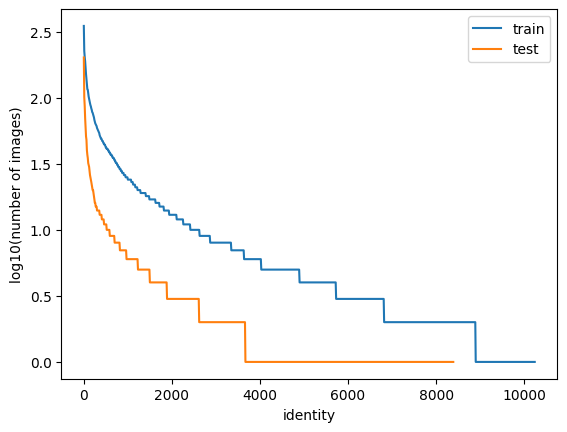

In [9]:
plt.plot(counts["train"], label="train")
plt.plot(counts["test"], label="test")
plt.xlabel("identity")
plt.ylabel("log10(number of images)")
plt.legend();

# Analysis of clusters

In [10]:
thresholds = np.linspace(0.9, 1, 21)
thresholds = np.round(thresholds, 3)
names_time_split = thresholds_manual.keys()

df_time = df[df["dataset"].isin(names_time_split)].copy()
for thr in thresholds:
    col = f"clusters_{thr}"
    for name, df_dataset in df_time.groupby("dataset"):
        file_name = f"{root_features}/features_{name}.npy"
        splitter = SplitterByFeatures(file_name, None, thr)
        clusters = splitter.get_clusters(df_dataset)
        df_time.loc[df_dataset.index, col] = clusters
    idx = ~df_time[col].isnull()
    df_time[col] = df_time[col].astype(object)
    df_time.loc[idx, col] = df_time.loc[idx, "identity"] + "_" + df_time.loc[idx, col].astype(str)

In [11]:
for name, df_dataset in df_time.groupby("dataset"):
    thr = thresholds_manual[name]
    col = f"clusters_{thr}"
    df_time.loc[df_dataset.index, "clusters_merged"] = df_dataset[col]

In [12]:
results = {}
for thr in list(thresholds) + ["merged"]:
    stats = []
    for _, group in df_time.groupby(f"clusters_{thr}"):
        counts = group["date"].value_counts()
        stats.append(
            {
                "FP": len(group) - counts.iloc[0],
                "TP": len(group) - 1,
            }
        )
    results[thr] = stats
results = pd.DataFrame({k: pd.DataFrame(v).sum().to_dict() for k, v in results.items()}).T
results.iloc[:-1].to_csv("results/fp_tp.csv")

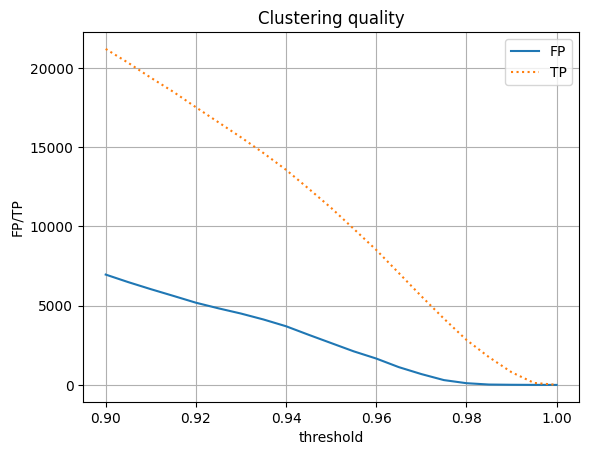

In [13]:
plt.plot(thresholds, results["FP"].iloc[:-1], label="FP", linestyle="-")
plt.plot(thresholds, results["TP"].iloc[:-1], label="TP", linestyle=":")
plt.xlabel("threshold")
plt.ylabel("FP/TP")
plt.title("Clustering quality")
plt.grid()
plt.legend();

In [14]:
i_max = 6
range_clusters = range(1, i_max + 1)
results_clusters = {x: {y: 0 for y in range_clusters} for x in range_clusters}
for identity, df_identity in df_time.groupby("identity"):
    thr = thresholds_manual[identity.split("_")[0]]
    cluster_name = f"clusters_{thr}"
    for cluster, df_cluster in df_identity.groupby(cluster_name):
        i = np.min([i_max, len(df_cluster)])
        j = np.min([i_max, df_cluster["date"].nunique()])
        results_clusters[i][j] += 1
results_clusters = pd.DataFrame(results_clusters).T
results_clusters["unique time"] = (
    np.round(100 * results_clusters[1] / results_clusters.sum(axis=1), 1).astype(str) + "\%"
)
print(results_clusters.replace({0: ""}).to_latex())

\begin{tabular}{llllllll}
\toprule
 & 1 & 2 & 3 & 4 & 5 & 6 & unique time \\
\midrule
1 &  &  &  &  &  &  & nan\% \\
2 & 3009 & 78 &  &  &  &  & 97.5\% \\
3 & 374 & 27 & 8 &  &  &  & 91.4\% \\
4 & 193 & 26 & 4 & 2 &  &  & 85.8\% \\
5 & 127 & 16 & 2 & 1 &  &  & 87.0\% \\
6 & 212 & 45 & 14 & 2 & 1 &  & 77.4\% \\
\bottomrule
\end{tabular}



# Val split

In [15]:
metadata = df.copy()
for name, metadata_dataset in metadata.groupby("dataset"):
    thr, splitter = names_thresholds[name]
    if thr != "time-aware" and thr is not None:
        path_features = f"{root_features}/features_{name}.npy"
        splitter = SplitterByFeatures(path_features, splitter, thr)
    metadata_train = metadata_dataset[metadata_dataset["split"] == "train"]
    _, idx_val = splitter.split(metadata_train)[0]
    metadata.loc[idx_val, "split"] = "val"
metadata.to_csv("results/metadata_val.csv", index=False)

In [16]:
summary = {}
for name, df_dataset in metadata.groupby("dataset"):
    idx_train = df_dataset[df_dataset["split"] == "train"].index
    idx_val = df_dataset[df_dataset["split"] == "val"].index
    idx_test = df_dataset[df_dataset["split"] == "test"].index

    split_data_test = splits.extract_data_split(df_dataset, list(idx_train) + list(idx_val), idx_test)
    split_data_val = splits.extract_data_split(df_dataset, list(idx_train), idx_val)

    if split_data["id_split"] != "open-set":
        raise Exception("split is not closed set")
    summary[name] = {
        "n": len(df_dataset),
        "n_individuals": df_dataset["identity"].nunique(),
        "ratio_train": split_data_val["n_train"] / len(df_dataset),
        "ratio_val": split_data_val["n_test"] / len(df_dataset),
        "ratio_test": split_data_test["n_test"] / len(df_dataset),
        "ratio_val_only": split_data_val["n_test_only"] / split_data_val["n_train"],
        "ratio_test_only": split_data_test["n_test_only"] / len(df_dataset),
        #'ratio_train_only': split_data2['n_train_only'] / split_data2['n'],
    }
    # wpefkpowef
summary = pd.DataFrame(summary).T
summary[["n", "n_individuals"]] = summary[["n", "n_individuals"]].astype(int)
summary

,n,n_individuals,ratio_train,ratio_val,ratio_test,ratio_val_only,ratio_test_only
AAUZebraFish,336,6,0.494048,0.208333,0.297619,0.277108,0.163690
ATRW,5415,182,0.639520,0.159187,0.201293,0.063240,0.054848
AerialCattle2017,2329,23,0.639760,0.161013,0.199227,0.076510,0.060970
AmvrakikosTurtles,200,50,0.440000,0.265000,0.295000,0.102273,0.060000
BelugaID,8559,788,0.604860,0.202360,0.192780,0.066641,0.050356
BirdIndividualID,2629,50,0.640928,0.157855,0.201217,0.080712,0.058577
CTai,4662,71,0.638353,0.160017,0.201630,0.087366,0.068855
CZoo,2109,24,0.639640,0.160266,0.200095,0.109711,0.082504
CatIndividualImages,13021,509,0.638507,0.160126,0.201367,0.066635,0.050303
Chicks4FreeID,1146,50,0.640489,0.158813,0.200698,0.066757,0.052356


In [17]:
metadata.split.value_counts() / len(metadata)

split
train    0.615163
test     0.217535
val      0.167303
Name: count, dtype: float64